In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings as warnings

df=pd.read_csv("C:/Users/shahc/Downloads/homeprices.csv")

In [2]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


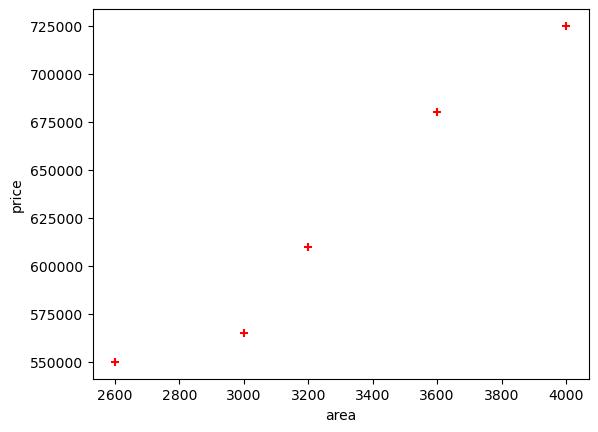

In [3]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color='red', marker='+')


In [4]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)


LinearRegression()

In [7]:
reg.predict([[3300]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.intercept_


180616.43835616432

In [9]:
reg.coef_



array([135.78767123])

In [10]:
reg.predict([[5000]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [11]:
#practice

In [12]:
df2=pd.read_csv("C:/Users/shahc/Downloads/canada_per_capita_income.csv")
df2.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [13]:
new_df2 = df2.drop('income',axis='columns')
new_df2.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [14]:
income=df2.income
income.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: income, dtype: float64

In [15]:
reg2 = linear_model.LinearRegression()
reg2.fit(new_df2,income)


LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

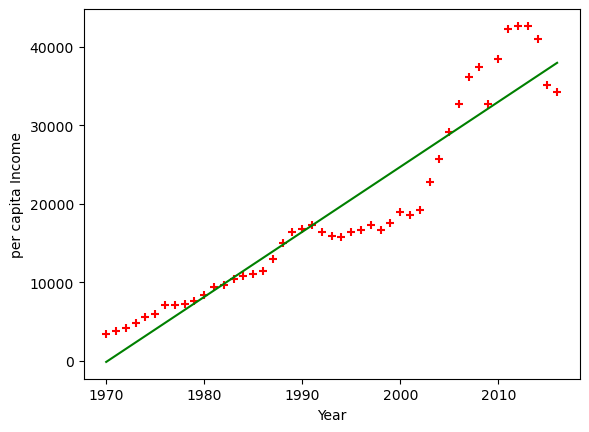

In [16]:
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("per capita Income")
plt.scatter(df2.year, df2.income, color='Red',marker='+' )
plt.plot(df2.year,reg2.predict(df2[['year']]),color='green')
plt.show

In [17]:
warnings.filterwarnings('ignore')
reg2.predict([[2030]])

array([49573.34484664])

In [18]:
#Multivalue linear regression


In [19]:
mv_df=pd.read_csv("C:/Users/shahc/Downloads/hiring.csv")
mv_df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [20]:
temp_df=mv_df.experience.fillna('0')
temp_df

0       0
1       0
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: experience, dtype: object

In [21]:
import math

mean = math.floor(mv_df.test_score.mean())
mean

7

In [22]:
temp2_df=mv_df.test_score.fillna(mean)
temp2_df
mv_df.test_score=temp2_df

In [23]:
mv_df.experience=temp_df
mv_df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [24]:
reg3=linear_model.LinearRegression()
reg3.fit(mv_df[['experience','test_score','interview_score']],mv_df.salary)

LinearRegression()

In [25]:
warnings.filterwarnings('ignore')
reg3.predict([[2,9,6]])

array([53713.86677124])

In [26]:
warnings.filterwarnings('ignore')
reg3.predict([[12,10,10]])

array([93747.79628651])

NameError: name 'model' is not defined